In [1]:
import h5py
import numpy as np
import pandas as pd
from cesium import featurize
import matplotlib.pyplot as plt 
#from MulticoreTSNE import MulticoreTSNE as TSNE
from sklearn.manifold import TSNE

import seaborn as sns 
plt.rcParams["figure.figsize"] = [16,9]
sns.set_style('whitegrid')

GRID_SIZE = 0.06
LOWER_LAMBDA = 6472.5
UPPER_LAMBDA = 6740
PLOT_MASK = range(1475,1550)

In [2]:
hf_spec = h5py.File("/data/praveen/GDR3_non_null_resampled_spectra.h5", "r")
df1 = pd.DataFrame(hf_spec["spectra"])

hf_spec_2 = h5py.File("/data/praveen/GDR3_missed60K_resampled_spectra.h5", "r")
df2 = pd.DataFrame(hf_spec_2["spectra"])

hf_grid = h5py.File("/data/praveen/wl_grid.h5", "r")
wl_grid = np.array(hf_grid["wl_grid"])

frames = [df1, df2]
result = pd.concat(frames)

In [3]:
hf_spec.close()
hf_spec_2.close()
hf_grid.close()

In [4]:
df_masked = result.loc[:,PLOT_MASK]
df_masked_np = df_masked.to_numpy()
wl_grid_array = np.tile(wl_grid[PLOT_MASK], (df_masked_np.shape[0],1)) #for compatability reasons, we need to create an (p,n) grid of "times" for (p,n) sames where n = number of timestamps 

In [5]:
df_masked.head()

,1475,1476,1477,1478,1479,1480,1481,1482,1483,1484,...,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549
0,1.002929,1.020100,1.024491,1.022349,1.012781,0.992014,0.972579,0.980616,1.017553,1.024633,...,0.981723,1.000010,1.010591,0.986887,0.998070,1.034840,1.039356,1.017275,1.003299,0.992692
1,0.913974,0.925080,0.914015,0.910713,0.909456,0.895285,0.886678,0.900813,0.901776,0.873538,...,0.920796,0.959569,0.955362,0.919839,0.916352,0.927437,0.954766,0.975278,0.964925,0.940629
2,0.852568,0.855619,0.852560,0.847285,0.843284,0.833912,0.815157,0.815373,0.822885,0.808645,...,0.850151,0.841934,0.837705,0.847344,0.861569,0.875073,0.886794,0.884729,0.878885,0.859658
3,0.799966,0.805414,0.790533,0.784372,0.764509,0.766564,0.785371,0.782442,0.776574,0.776972,...,0.826576,0.834315,0.820822,0.824237,0.821758,0.825028,0.833799,0.852333,0.860145,0.859907
4,0.762165,0.753905,0.756847,0.772023,0.768651,0.756399,0.747767,0.750086,0.752324,0.737946,...,0.807266,0.821148,0.830479,0.826671,0.820743,0.815063,0.803316,0.793477,0.788137,0.810344


In [6]:
wl_grid_array.shape

(588344, 75)

In [7]:
df_masked_np.shape

(588344, 75)

In [8]:
wl_grid_list = list(wl_grid_array) #cesium takes inputs as a list of (p,n) time series so we convert to a list 
df_masked_list = list(df_masked_np)

In [9]:
features_to_use = ["amplitude","maximum","minimum","all_times_nhist_numpeaks"]

In [10]:
fset_cesium = featurize.featurize_time_series(times=wl_grid_list ,values=df_masked_list, errors=None,features_to_use=features_to_use) #feature computation step

In [11]:
print(fset_cesium.head())

feature amplitude   maximum   minimum all_times_nhist_numpeaks
channel         0         0         0                        0
0        0.355802  1.074264  0.362660                     24.0
1        0.383127  0.975278  0.209023                     24.0
2        0.338782  0.886794  0.209230                     24.0
3        0.320627  0.860145  0.218891                     24.0
4        0.305086  0.830479  0.220307                     24.0


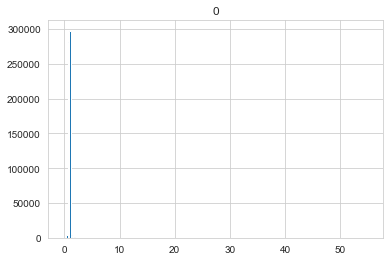

In [12]:
%matplotlib inline
hist_maximum = fset_cesium["maximum"].hist(bins=200)

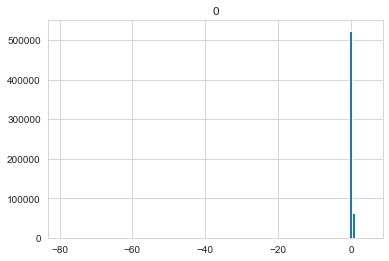

In [13]:
hist_maximum = fset_cesium["minimum"].hist(bins=100)

In [14]:
import seaborn as sns 
plt.rcParams["figure.figsize"] = [16,9]
sns.set_style('whitegrid')

(1.0, 3.0)

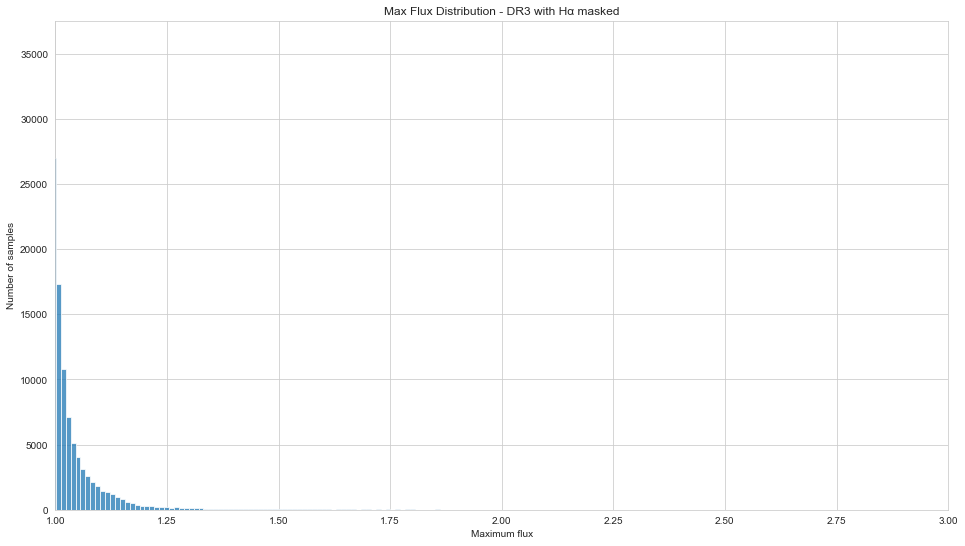

In [22]:
fig, ax = plt.subplots()
ax.hist(fset_cesium["maximum"], bins=5000, alpha=.75)
ax.set_ylabel("Number of samples")
ax.set_xlabel("Maximum flux")
ax.set_title("Max Flux Distribution - DR3 with Hα masked")
ax.set_xlim([1, 3.0])
#ax.set_ylim([0, 5])

(0.0, 1.5)

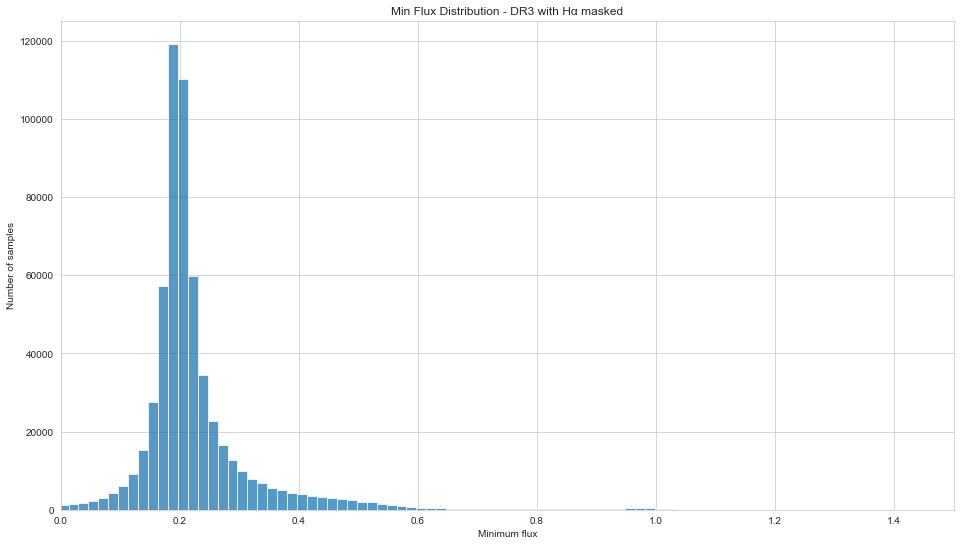

In [16]:
fig, ax = plt.subplots()
ax.hist(fset_cesium["minimum"], bins=5000, alpha=.75)
ax.set_ylabel("Number of samples")
ax.set_xlabel("Minimum flux")
ax.set_title("Min Flux Distribution - DR3 with Hα masked")
ax.set_xlim([0, 1.5])
#ax.set_ylim([0, 5])

In [17]:
max_less_than_1 = fset_cesium.index[fset_cesium['maximum'] > 1].tolist()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed